# Justin Butler

In [4]:
%%javascript
// Making sure the outputs display correctly
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Atmospheric model created using the NASA equation found at:
# https://www.grc.nasa.gov/WWW/k-12/airplane/atmosmet.html
class atmosphere:
    def __init__(self, val, valGiven = 0,units = "SI"):
        #Convert from US to SI
        if units != "SI" and valGiven == 0:
            val = val / 3.281
        if units != "SI" and valGiven == 1:
            val = val * 0.04788
        #0 implies the given value is an altitude
        #1 implies the given value is a pressure
        if valGiven == 0:
            self.h = val
        elif valGiven == 1:
            self.P = val
        else:
            print("Not a valid 'valGiven' parameter.")
    def hCalc(self):
        if self.h < 11000:
            self.T = 15.04 - 0.00649*self.h
            self.P = 101.29 * ((self.T + 273.1)/288.08)**(5.256)
        elif self.h < 25000:
            self.T = -56.46
            self.P = 22.65 * np.exp(1.73 - 0.000157*self.h)
        elif self.h > 24999:
            self.T = -131.21 + 0.00299*self.h
            self.P = 2.488 * ((self.T + 273.1)/216.6)**(-11.388)
        self.rho = self.P / (0.2869 * (self.T + 273.1))
    def PCalc(self):
        if self.P > 22.632:
            self.T = (288.08*(self.P/101.29)**(1/5.256))-273.1
            self.h = (self.T - 15.04)/(-0.00649)
        elif self.P > 0.1113586:
            self.T = -56.46
            self.h = (1.73 - np.log((self.P/22.65)))/(0.000157)
        else:
            self.T = (216.6*(self.P/2.488)**(1/(-11.388)))-273.1
            self.h = (self.T + 131.21)/0.00299
        self.rho = self.P / (0.2869 * (self.T + 273.1))

In [10]:
# ISENTROPIC RELATIONS
def totalPres(Ps, M,gamma=1.4):
    total = Ps * ((1+((gamma-1)/2)*M**2)**(gamma/(gamma-1)))
    return(total)
def statPres(Pt, M, gamma=1.4):
    static = Pt / ((1+((gamma-1)/2)*M**2)**(gamma/(gamma-1)))
    return(static)
def totalTemp(Ts, M, gamma=1.4):
    total = Ts * ((1+((gamma-1)/2)*M**2))
    return(total)
def statTemp(Tt, M, gamma=1.4):
    static = Tt / ((1+((gamma-1)/2)*M**2))
    return(static)

In [7]:
## SETTING UP SOME FUNCTIONS FOR THE PROBLEM ##
def dmDot(x):
    a = (np.pi /2)*(2.9/3)
    dmDot = a * np.sin(np.pi*x)
    return(dmDot)
def CpAir(T):
    coef = [1.0575*10**3, -4.489*10**(-1),
            1.1407*10**(-3),-7.9999*10**(-7),
            1.9327*10**(-10)]
    Cp = 0
    for i in range(len(coef)):
        Cp+=coef[i]*(T**i)
    return(Cp)
def CpH2O(T):
    if T>500 and T<1700:
        coef = [30.092, 6.832514,
                .793435,-2.33448,
                0.082139]
    elif T>1699 and T<6000:
        coef = [41.96426, 8.622053,
                -1.499780, 0.098119,
                -11.15764]
    else:
        print("Invalid temperature for CpH20")
        return(None)
    Cp = 0
    for i in range(len(coef)):
        Cp+=coef[i]*(T/1000)**i
    return(Cp)

    




In [11]:
## SETTING UP PARAMETERS ##
mDotAir = 100 #kg/s
M0 = 6
M3 = 2.5
h = 100000/0.3048 #meters
# Take these parameters and get more values
atmos = atmosphere(h,valGiven=0)
atmos.hCalc()
P0 = atmos.P
T0 = atmos.T
rho0 = atmos.rho
Pt0 = totalPres(P0,M0)
Tt0 = totalTemp(T0,M0)
Pt3 = Pt0*0.7
Tt3 = Tt0
P3 = statPres(Pt3,M3)
T3 = statTemp(Tt3,M3)

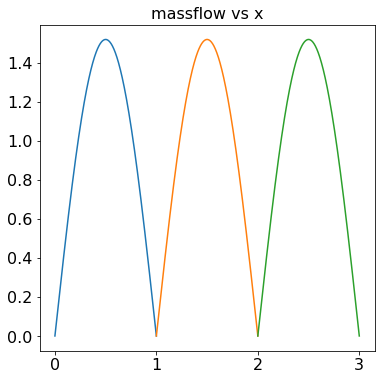

In [8]:
x1 = np.linspace(0,1,500)
x2 = np.linspace(0,1,500)
x3 = np.linspace(0,1,500)
y1 = [dmDot(item) for item in x1]
y2 = [dmDot(item) for item in x2]
y3 = [dmDot(item) for item in x3]
x2 = [item + 1 for item in x2]
x3 = [item + 2 for item in x3]

## GRAPHING TIME! ##
plt.figure(figsize=(6,6))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
#
plt.plot(x1,y1,'-')
plt.plot(x2,y2,'-')
plt.plot(x3,y3,'-')
#
plt.title('massflow vs x', fontsize=16)
#
#plt.ylim(0,1.5)
#plt.xlabel('Massflow ratio: $m_{air}$/$m_{fuel}$', fontsize=14)
#plt.ylabel('Exit Area $A_e$ ($m^2$)', fontsize=14)
#plt.legend(loc=2, fontsize=16)

plt.show()
plt.close()